# On the Analytical Solution to KdV Equation
Guorui Shen, guorui233@outlook.com

Jun 27, 2019

## Intro to KdV Equation
KdV equation is 
\begin{align}
u_t+\alpha uu_x+\beta u_{xxx}=0,
\end{align}

### One-Soliton Solution
It admits the one-soliton solution
\begin{align}
u(x,t) = \frac{c}{2}\cdot \text{sech}^2(\sqrt c\cdot\frac{\xi}{2}),
\end{align}
where $c>0$ is wave speed and $\xi =x-c\cdot t$ is a moving coordinate. The position of the wave peak at time $t$ is $x = ct$.
### Two-Soliton Solution
The two solitons travel from left to right with different speeds $c_1\geq c_2$. At $x = t = 0$, they will collide with each other. When $\frac{c_1}{c_2} > 3$, the profile has a single peak at $x=0$ and when $\frac{c_1}{c_2} < 3$, the profile has a double peak around $x=0$.

**Reference**
+ http://lie.math.brocku.ca/~sanco/solitons/kdv_solitons.php, accessed Jun 27, 2019.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm # 3D surface color
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar
import scipy.io as sio

In [2]:
def kdv_solution(x, t, c1, c2):
    xi1, xi2 = x-c1*t, x-c2*t
    a = 2*(c1-c2)*(c1*np.cosh(np.sqrt(c2)*xi2*.5)**2 + c2*np.sinh(np.sqrt(c1)*xi1*.5)**2)
    b = ((np.sqrt(c1)-np.sqrt(c2))*np.cosh((np.sqrt(c1)*xi1+np.sqrt(c2)*xi2)*.5) + 
        (np.sqrt(c1)+np.sqrt(c2))*np.cosh((np.sqrt(c1)*xi1-np.sqrt(c2)*xi2)*.5))**2
    return a/b

In [3]:
x = np.arange(-35, 15, .1)
t = np.arange(-30, 10, .1)
c1 = 1. # wave speed of the 1st soliton, peak=c1/2
c2 = .3 # wave speed of the 2nd soliton, peak=c2/2

In [4]:
u = np.zeros((len(t), len(x)))
for i in range(len(x)):
    for j in range(len(t)):
        u[j, i] = kdv_solution(x[i], t[j], c1, c2)

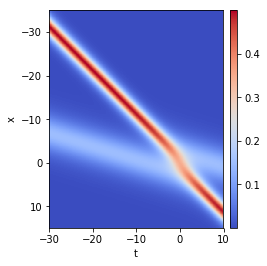

In [5]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

# im = ax.imshow(U.T, vmin=U.min(), vmax=U.max(), cmap=cm.coolwarm)
im = ax.imshow(u.T, vmin=u.min(), vmax=u.max(), cmap=cm.coolwarm, extent=[t[0], t[-1], x[-1], x[0]])
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_aspect(1)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax_val = divider.append_axes("right", size="4%", pad=0.1)

plt.colorbar(im, cax=cax_val)
plt.show()

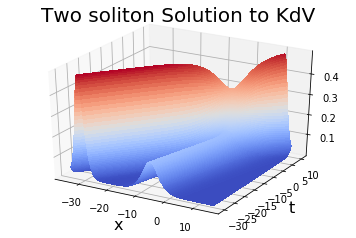

In [6]:
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, u, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
plt.title('Two soliton Solution to KdV', fontsize = 20)
plt.xlabel('x', fontsize = 16)
plt.ylabel('t', fontsize = 16)
plt.show()

In [7]:
print(len(t))

400


Text(0.5,0,u'x')

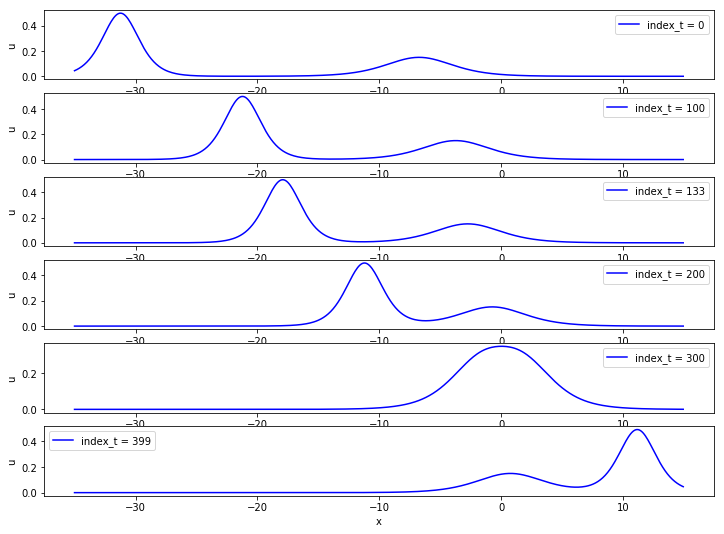

In [8]:
plt.figure(figsize=(12, 12))
plt.subplot(311)
plt.title('Snapshot of KdV equation')
a = [0, len(t)/4, len(t)/3, 200, 300, len(t)-1]
for i,j in zip(range(len(a)), a):
    plt.subplot(811+i)
    plt.plot(x, u[j, :], 'b-')
    plt.ylabel('u')
    plt.legend(['index_t = {}'.format(j)])
plt.xlabel('x')

In [9]:
sio.savemat('twoSolitonKdV.mat', {'u':u, 'x':x, 't':t})